# Collected data from Linkedin jobs postings

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
title = "Software Developer"  
location = "Stockholm"
date = "2025-11-25"
NUMBER_OF_JOBS_TO_FETCH = 600
SAVE_DATA = True
print(f"The data that was collected was for the role {title} in {location}, there was {NUMBER_OF_JOBS_TO_FETCH} job posts requsted")

The data that was collected was for the role Software Developer in Stockholm, there was 600 job posts requsted


## The raw data 

This is how the data looked like that was collected

In [3]:
jobs_df = pd.read_csv(f'./results/jobs_{title}_{location}_{date}.csv')
jobs_df.head(10)

,job_title,company_name,location,time_posted,num_applicants
0,Software Engineer,Sana,Stockholm,1 month ago,0
1,Backend Engineer (Learn),Sana,Stockholm,1 month ago,68
2,Full-stack developer,TMC Sweden,Stockholm,1 week ago,69
3,Front-end utvecklare,Enmanskonsulterna,Stockholm,1 month ago,84
4,"Software Engineer, Backend",Truecaller,Stockholm,6 days ago,85
5,Front-End Developer,Checkin.com,Stockholm,1 month ago,0
6,Junior Web Developer,Leadstar Media,Stockholm,4 weeks ago,0
7,Software Engineer,Nordiska,Stockholm,2 weeks ago,26
8,Software Engineer,Nordiska,Stockholm,2 weeks ago,33
9,Game developer,Nolimit City®,Stockholm,1 week ago,0


In [4]:
skill_usage = pd.read_csv(f"./results/skills_{title}_{location}_{date}.csv")
skill_usage.sort_values(by="Number of Job Postings", inplace=True, ascending=False)
skill_usage.reset_index(inplace=True)
skill_usage.drop(columns=["index"], inplace=True)
skill_usage.head(25)

,Programming Skill,Number of Job Postings
0,Git,110
1,Java,71
2,AWS,66
3,CI/CD,64
4,Python,63
5,Rust,59
6,DevOps,56
7,SQL,55
8,Azure,53
9,React,52


--- 

### Locations

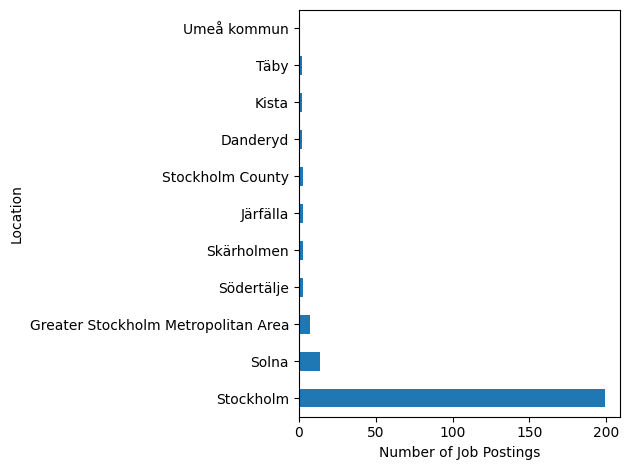

In [5]:
jobs_df["location"].value_counts().head(15).plot(kind='barh')
plt.ylabel('Location')
plt.xlabel('Number of Job Postings')
plt.tight_layout()

---

### Companies

The companies with the most number of job postings

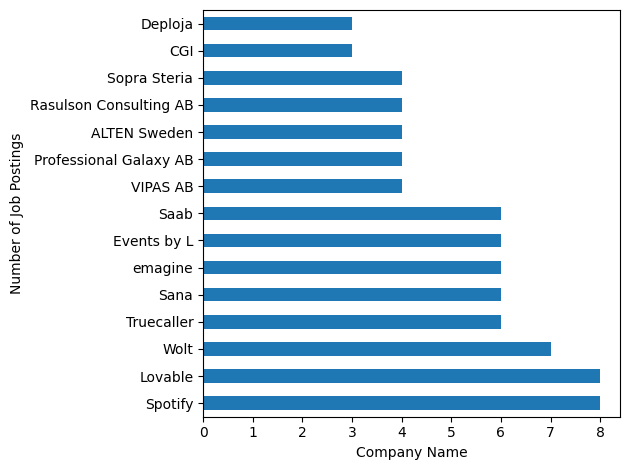

In [6]:
jobs_df["company_name"].value_counts().head(15).plot(kind='barh')
plt.xlabel('Company Name')
plt.ylabel('Number of Job Postings')
plt.tight_layout()
plt.show()

We can also look at the number of days that diffrent companies job posting stay up. 
This tell us how diffuclt it is for diffrent companies to fill roles. 

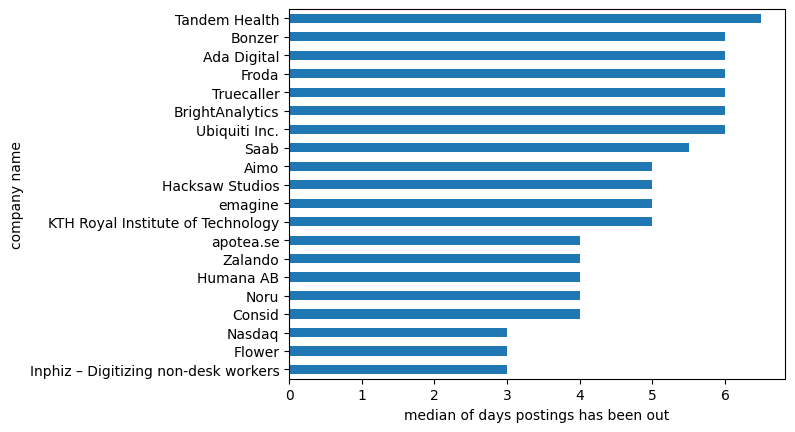

In [7]:
time_df = jobs_df.copy()
time_df.dropna(inplace=True)

def convert_to_days(text):
    num, unit, _ = text.split(" ")
    num = int(num)
    if "days" == unit:
        return num
    if unit in ["week", "weeks"]: 
        return num * 7
    if unit in ["month", "months"]: 
        return num * 30
    if "years" == unit:
        return num * 365
    return None

time_df["time_posted"] = time_df["time_posted"].apply(convert_to_days)
grouped_df = time_df.groupby("company_name", as_index=False)["time_posted"].median()
grouped_df.sort_values("time_posted", inplace=True)
grouped_df.head(20).plot.barh(x="company_name", y="time_posted", legend=False)
plt.xlabel('median of days postings has been out')
plt.ylabel('company name')
plt.show()

Then we can look at how many pepole have applyied to diffrent companies, this migt also be an indicator on that they have a hard time finding the right person. 

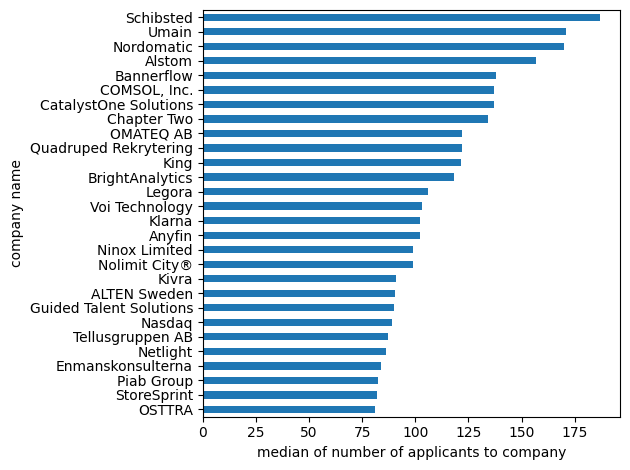

In [13]:
hot_company = jobs_df.copy()
hot_company = hot_company.groupby("company_name", as_index=False)["num_applicants"].median()
hot_company.sort_values("num_applicants", inplace=True)
hot_company = hot_company[hot_company["num_applicants"] > 80]
hot_company.plot.barh(x="company_name", y="num_applicants", legend=False)
plt.xlabel('median of number of applicants to company')
plt.ylabel('company name')
plt.tight_layout()

---


## The applicant

The job title can tell ut what type of person companies are looking fore. 

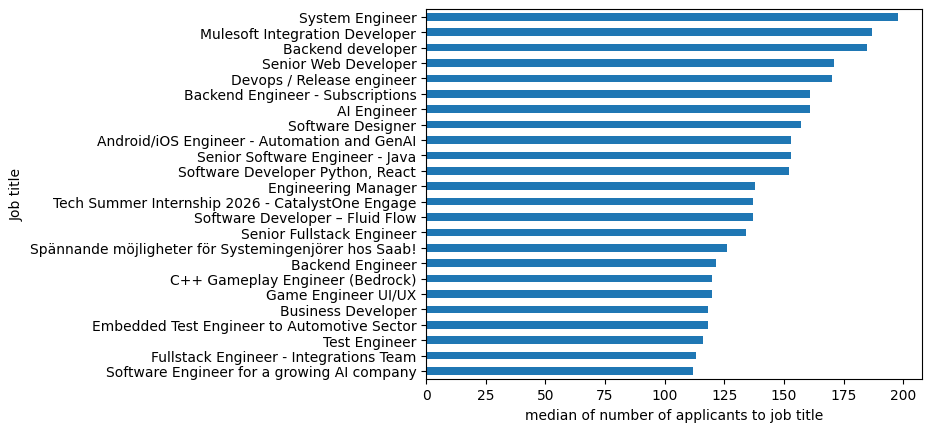

In [16]:

hot_title = jobs_df.copy()
hot_title = hot_title.groupby("job_title", as_index=False)["num_applicants"].median()
hot_title.sort_values("num_applicants", inplace=True)
hot_title = hot_title[hot_title["num_applicants"] > 110]
hot_title.plot.barh(x="job_title", y="num_applicants", legend=False)
plt.xlabel('median of number of applicants to job title')
plt.ylabel('Job title')
plt.show()

#### Skills with the most requests 

In [10]:
skill_usage = pd.read_csv(f"./results/skill_usage_{title}_{location}_{date}.csv")
skill_usage.head(20)

,index,Number of Companies
0,Git,78
1,Java,55
2,Python,51
3,CI/CD,46
4,SQL,46
5,AWS,44
6,DevOps,43
7,Azure,42
8,Rust,36
9,React,35
